In [2]:
import tensorflow as tf

# Define some parameters for our dataset
IMG_WIDTH = 224
IMG_HEIGHT = 224
BATCH_SIZE = 32

# Update this path to point to your dataset folder
DATA_DIR = 'garbage-dataset' 

# Create the training and validation datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE
)

# Get the class names from the directory structure
class_names = train_ds.class_names
print("Class Names:", class_names)

Found 19762 files belonging to 10 classes.
Using 15810 files for training.
Found 19762 files belonging to 10 classes.
Using 3952 files for validation.
Class Names: ['battery', 'biological', 'cardboard', 'clothes', 'glass', 'metal', 'paper', 'plastic', 'shoes', 'trash']


In [3]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import MobileNetV2

# Create the base model from the pre-trained MobileNetV2 model
base_model = MobileNetV2(input_shape=(IMG_WIDTH, IMG_HEIGHT, 3),
                         include_top=False, # We don't need the classification layers
                         weights='imagenet')

# Freeze the base model's layers
# This prevents the weights of the pre-trained model from being updated during training.
base_model.trainable = False

# Create your new model on top of the base model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(), # Reduces the spatial dimensions of the features
    Dense(len(class_names), activation='softmax') # The new classification layer with the correct number of outputs
])

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()

# Train the model for 10 epochs
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,270,794 (8.66 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 130s 229ms/step - accuracy: 0.5769 - loss: 1.2589 - val_accuracy: 0.6546 - val_loss: 1.0409
Epoch 2/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 128s 259ms/step - accuracy: 0.6806 - loss: 0.9536 - val_accuracy: 0.6705 - val_loss: 0.9805
Epoch 3/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 138s 278ms/step - accuracy: 0.7140 - loss: 0.8600 - val_accuracy: 0.7060 - val_loss: 0.9013
Epoch 4/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 124s 251ms/step - accuracy: 0.7307 - loss: 0.8081 - val_accuracy: 0.7052 - val_loss: 0.8814
Epoch 5/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 121s 245ms/step - accuracy: 0.7442 - loss: 0.7675 - val_accuracy: 0.7009 - val_loss: 0.8878
Epoch 6/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 1582s 3s/step - accuracy: 0.7581 - loss: 0.7340 - val_accuracy: 0.7196 - val_loss: 0.8466
Epoch 7/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 161s 326ms/step - accuracy: 0.7636 - loss: 0.7118 - val_accuracy: 0.7126 - val_loss: 0.8711
Epoch 8/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 115s 232ms/step - accuracy: 0.7712 - l

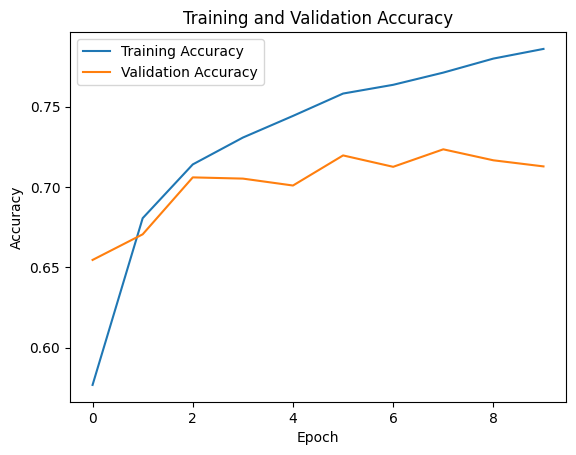

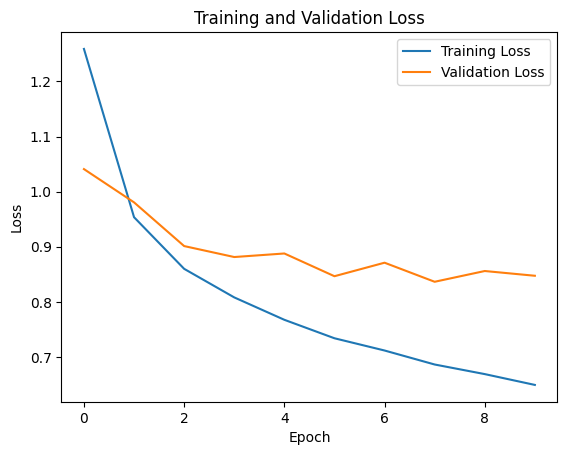

In [6]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [7]:
# Save the entire model to a file
model.save('waste_classifier_model.h5')
print("Model saved successfully!")

Model saved successfully!


In [8]:
management_dict = {
    "battery": "Dispose of batteries at certified e-waste centers. Do not throw in regular trash.",
    "biological": "Compost this waste. It can be turned into nutrient-rich soil.",
    "cardboard": "Recycle cardboard boxes. Flatten them before disposal.",
    "clothes": "Donate old clothes or recycle them at textile recycling bins.",
    "glass": "Wash and reuse glass containers or recycle them.",
    "metal": "Recycle metal cans, foil, and scrap metal.",
    "paper": "Recycle paper products. Do not mix with plastic or food waste.",
    "plastic": "Recycle plastic bottles, containers, and packaging.",
    "shoes": "Donate or find a specialized recycling program for old shoes.",
    "trash": "This is general waste. It should be disposed of in a landfill or incinerated."
}

In [1]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('waste_classifier_model.h5')

# Make sure you have the correct class names list
class_names = ['battery', 'biological', 'cardboard', 'clothes', 'glass', 'metal', 'paper', 'plastic', 'shoes', 'trash']

# Load a new image for prediction
img_path = 'garbage-dataset/mouse.jpg' # Replace with the actual path to your image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) # Add a batch dimension

# Normalize the image data to match the training data
img_array = img_array / 255.0

# Make a prediction
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

# Get the predicted class name
predicted_class = class_names[np.argmax(score)]
confidence = 100 * np.max(score)

print("Detected Waste:", predicted_class)
print("Confidence: {:.2f}%".format(confidence))
print("Management Tip:", management_dict.get(predicted_class, "Information not available."))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 780ms/step


NameError: name 'tf' is not defined